In [6]:
import pickle
import matplotlib.pyplot as plt

In [14]:

import pandas as pd
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
%matplotlib inline

def plot_contour(x,y,z,resolution = 50,contour_method='linear'):
    resolution = str(resolution)+'j'
    X,Y = np.mgrid[min(x):max(x):complex(resolution),   min(y):max(y):complex(resolution)]
    points = [[a,b] for a,b in zip(x,y)]
    Z = griddata(points, z, (X, Y), method=contour_method)
    return X,Y,Z

In [17]:
defaults = {'sigma': 25/3, 'tau': 25/300, 'beta': 25/6}
defaults_fancy = {'sigma': "\mu/3", 'tau': "\mu/300", 'beta': "\mu/6"}

def plot_file(fn, param1, param2):
    
    fig, ax = plt.subplots()
    x=pickle.load(open(fn, 'rb'))
    
    X = []
    y = []
    for params, acc in x:
#         print(params)
        X.append([params[param1], params[param2]])
        y.append([acc])

    import numpy as np
    X = np.array(X)
    y = np.array(y)
    
    # GP
    import GPy
    gpy_model = GPy.models.GPRegression(np.log10(X), y, GPy.kern.RBF(2, lengthscale=1, variance=0.001), noise_var=1e-5)
  
#     y2 = y
    y2, yerr = gpy_model.predict(np.log10(X))
#     print(y2)
    
    plt.contour(*plot_contour(np.log10(X[:, 0]), np.log10(X[:, 1]), y2[:,0]), levels=20, colors='white', alpha=0.7, linewidths=1)
    plt.contourf(*plot_contour(np.log10(X[:, 0]), np.log10(X[:, 1]), y2[:,0]), levels=20, linestyles='solid', cmap='plasma')
    plt.colorbar()
    plt.xlabel(f'$\{param1}$')
    plt.ylabel(f'$\{param2}$')
    plt.scatter(np.log10([defaults[param1]]), np.log10([defaults[param2]]), c='r', marker='x')
    
    param_default = [k for k in defaults if k != param1 and k != param2][0]
    plt.title(f"Sensitivity Analysis of $\\{param1}, \\{param2}$\n$\mu = 25, \\{param_default}={defaults_fancy[param_default]}$")
    # plt.xscale('log')
    # plt.yscale('log')
#     print(plt.xticks()[0])

    print(np.power(10, plt.xticks()[0]))
    labels = [f"$10^{{{item.get_text()}}}$" for item in ax.get_xticklabels()]
    ax.set_xticklabels(labels)
    labels = [f"$10^{{{item.get_text()}}}$" for item in ax.get_yticklabels()]
    ax.set_yticklabels(labels)


#     plt.xticks(np.power(10, plt.xticks()))
    # plt.contour(*plot_contour(np.log10(X[:, 0]), np.log10(X[:, 1]), y[:,0]), linestyles='solid', colors='black')

In [86]:
defaults = {'sigma': 25/3, 'tau': 25/300, 'beta': 25/6}
defaults_fancy = {'sigma': "\mu/3", 'tau': "\mu/300", 'beta': "\mu/6"}

def plot_files(output, params, cmap="inferno"):
    
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    fig.tight_layout()
    levels = 25
    for i, (fn, param1, param2) in enumerate(params):
        x=pickle.load(open(fn, 'rb'))
        ax = axes[i]

        X = []
        y = []
        for params, acc in x:
            X.append([params[param1], params[param2]])
            y.append([acc])

        import numpy as np
        X = np.array(X)
        y = np.array(y)

        # GP
        import GPy
        gpy_model = GPy.models.GPRegression(np.log10(X), y, GPy.kern.RBF(2, lengthscale=1, variance=0.001), noise_var=1e-5)
        y2, yerr = gpy_model.predict(np.log10(X))

        cp = ax.contour(*plot_contour(np.log10(X[:, 0]), np.log10(X[:, 1]), y2[:,0]), levels=levels, colors='white', alpha=0.7, linewidths=1)
        levels = cp.levels
        cp = ax.contourf(*plot_contour(np.log10(X[:, 0]), np.log10(X[:, 1]), y2[:,0]), levels=levels, linestyles='solid', cmap=cmap)
#         ax.colorbar()
        ax.set_xlabel(f'$\log_{{10}}{{\{param1}}}$')
        ax.set_ylabel(f'$\log_{{10}}{{\{param2}}}$')
        ax.scatter(np.log10([defaults[param1]]), np.log10([defaults[param2]]), c='r', marker='x')

        param_default = [k for k in defaults if k != param1 and k != param2][0]
        ax.set_title(f"Sensitivity Analysis of $\\{param1}, \\{param2}$\n$\mu = 25, \\{param_default}={defaults_fancy[param_default]}$")
        # plt.xscale('log')
        # plt.yscale('log')
#         ax.color
    #     print(plt.xticks()[0])

#         print(np.power(10, plt.xticks()[0]))
#         labels = [f"$10^{{{item.get_text()}}}$" for item in ax.get_xticklabels()]
#         ax.set_xticklabels(labels)
#         labels = [f"$10^{{{item.get_text()}}}$" for item in ax.get_yticklabels()]
#         ax.set_yticklabels(labels)


#     plt.xticks(np.power(10, plt.xticks()))
    # plt.contour(*plot_contour(np.log10(X[:, 0]), np.log10(X[:, 1]), y[:,0]), linestyles='solid', colors='black')
#     fig.colorbar(cp, ax=axes.ravel().tolist())
    plt.subplots_adjust(wspace=0.25)
    
    plt.savefig(output, bbox_inches = "tight")

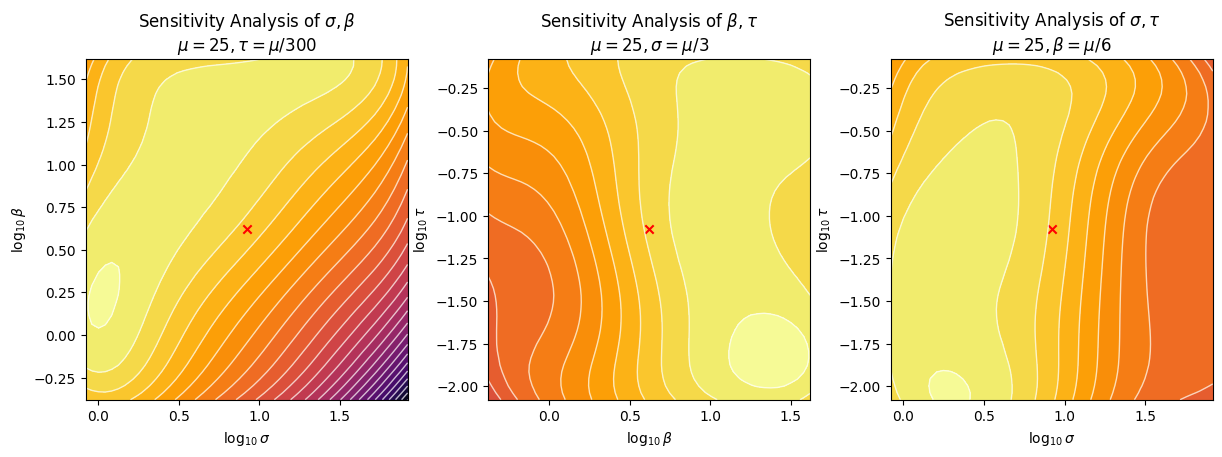

In [84]:
plot_files('ts_sensitivity.pdf', [
    ('../output/ts_search1.pkl', 'sigma', 'beta'),
    ('../output/ts_search2.pkl', 'beta', 'tau'),
    ('../output/ts_search3.pkl', 'sigma', 'tau')
])

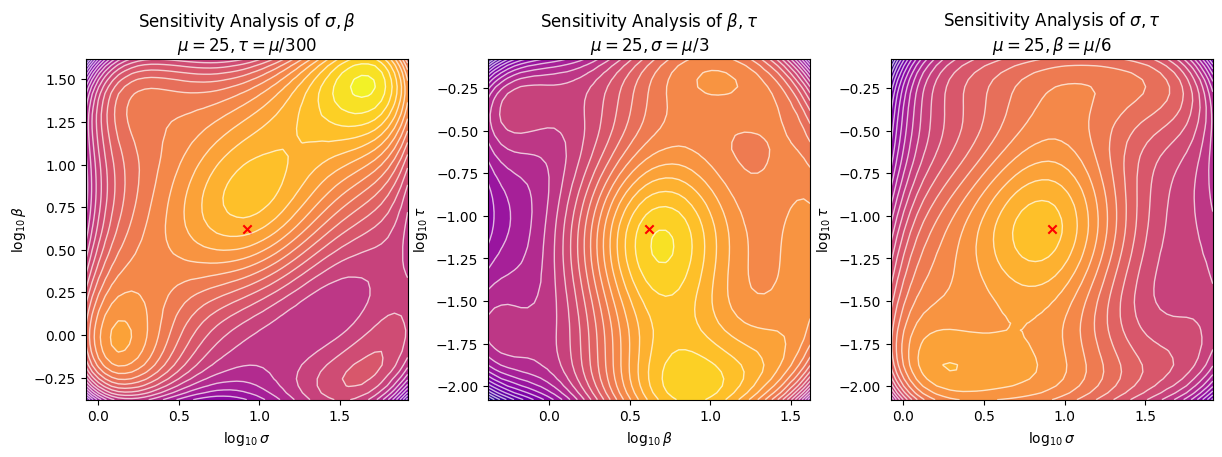

In [87]:
plot_files('tsp_sensitivity.pdf', [
    ('../output/tsp_search1.pkl', 'sigma', 'beta')
    ('../output/tsp_search2.pkl', 'beta', 'tau'),
    ('../output/tsp_search3.pkl', 'sigma', 'tau')
], cmap="plasma")

[  0.56234133   1.           1.77827941   3.16227766   5.62341325
  10.          17.7827941   31.6227766   56.23413252 100.        ]


 /tmp/ipykernel_855126/183408202.py:43: UserWarning:FixedFormatter should only be used together with FixedLocator
 /tmp/ipykernel_855126/183408202.py:45: UserWarning:FixedFormatter should only be used together with FixedLocator


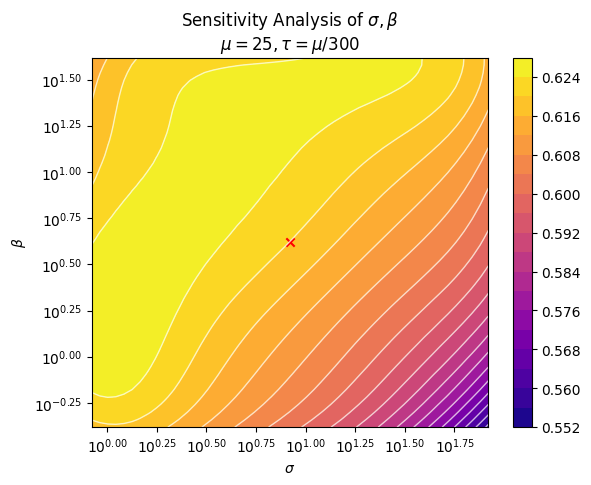

In [30]:
plot_file('../output/ts_search1.pkl', 'sigma', 'beta')

[ 0.31622777  0.56234133  1.          1.77827941  3.16227766  5.62341325
 10.         17.7827941  31.6227766  56.23413252]


 /tmp/ipykernel_855126/183408202.py:43: UserWarning:FixedFormatter should only be used together with FixedLocator
 /tmp/ipykernel_855126/183408202.py:45: UserWarning:FixedFormatter should only be used together with FixedLocator


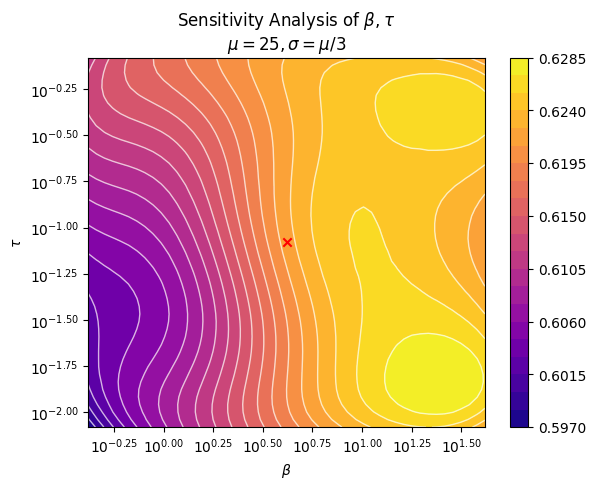

In [20]:
plot_file('../output/ts_search2.pkl', 'beta', 'tau')

[  0.56234133   1.           1.77827941   3.16227766   5.62341325
  10.          17.7827941   31.6227766   56.23413252 100.        ]


 /tmp/ipykernel_855126/183408202.py:43: UserWarning:FixedFormatter should only be used together with FixedLocator
 /tmp/ipykernel_855126/183408202.py:45: UserWarning:FixedFormatter should only be used together with FixedLocator


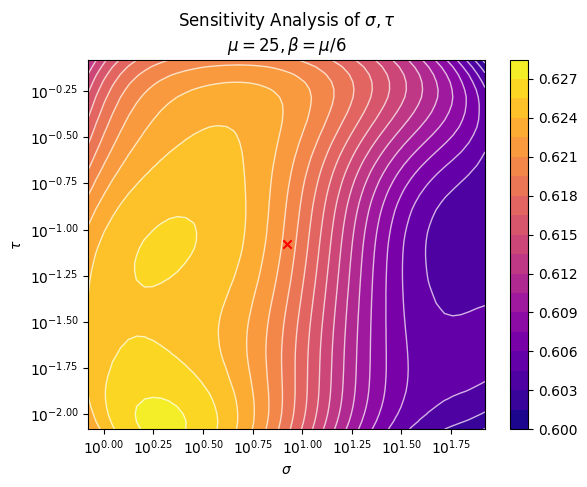

In [22]:
plot_file('../output/ts_search3.pkl', 'sigma', 'tau')

In [355]:
x=pickle.load(open('output/ts_search1.pkl', 'rb'))

In [15]:
X = []
y = []
for params, acc in x:
    print(params)
    X.append([params['sigma'], params['beta']])
    y.append([acc])
    
import numpy as np
X = np.array(X)
y = np.array(y)

{'mu': 25, 'sigma': 0.8333333333333334, 'beta': 2.7561419338458952, 'tau': 0.08333333333333333}
{'mu': 25, 'sigma': 0.8333333333333334, 'beta': 4.420076479747701, 'tau': 0.08333333333333333}
{'mu': 25, 'sigma': 0.8333333333333334, 'beta': 29.2376595279326, 'tau': 0.08333333333333333}
{'mu': 25, 'sigma': 0.8333333333333334, 'beta': 25.981280588641308, 'tau': 0.08333333333333333}
{'mu': 25, 'sigma': 0.8333333333333334, 'beta': 32.90217861874886, 'tau': 0.08333333333333333}
{'mu': 25, 'sigma': 0.8333333333333334, 'beta': 18.231164062809107, 'tau': 0.08333333333333333}
{'mu': 25, 'sigma': 0.8333333333333334, 'beta': 3.10158458885487, 'tau': 0.08333333333333333}
{'mu': 25, 'sigma': 0.8333333333333334, 'beta': 4.974069340476818, 'tau': 0.08333333333333333}
{'mu': 25, 'sigma': 0.8333333333333334, 'beta': 16.200646584617026, 'tau': 0.08333333333333333}
{'mu': 25, 'sigma': 0.8333333333333334, 'beta': 20.516177632111408, 'tau': 0.08333333333333333}
{'mu': 25, 'sigma': 0.8333333333333334, 'beta':

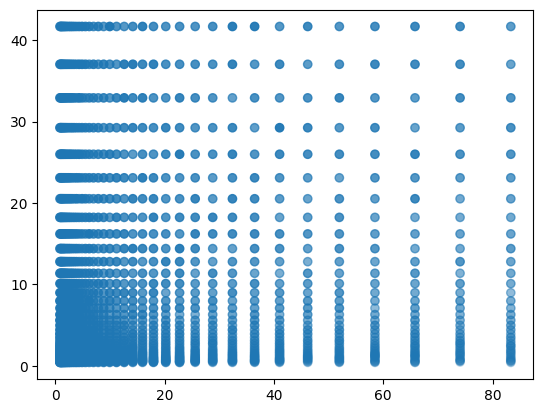

In [33]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], alpha=(y-y.min()) / (y.max() - y.min()))

In [44]:
!pip install GPy

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.4/959.4 kB 24.5 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 205.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 137.8 MB/s eta 0:00:00
  Created wheel for GPy: filename=GPy-1.10.0-cp310-cp310-linux_x86_64.whl size=1560586 sha256=13bd170342e7bb08638b0b9bc526976768a581b767a9802afaceca4348a65711
  Stored in directory: /tmp/pip-ephem-wheel-cache-b70x_17g/wheels/1c/13/d2/18ba56e6f6bf00c6f1562724da66f84537d17febb0415c4aa7
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102549 sha256=022b542e85b0ea46dd0f33c5187eb765f1ff43ab76af4a78bf2c69f97cecebea
  Stored in directory: /tmp/pip-ephem-wheel-cache-b70x_17g/wheels/a4/e7/da/52596690bfd1d424fdd41bde0e13cd9d35a816314bb3f00a6e
Successfully built GPy paramz


In [54]:
import GPy
# from emukit.model_wrappers.gpy_model_wrappers import GPyModelWrapper

gpy_model = GPy.models.GPRegression(np.log10(X), y, GPy.kern.RBF(1, lengthscale=0.1, variance=0.001), noise_var=1e-10)
# emukit_model = GPyModelWrapper(gpy_model)

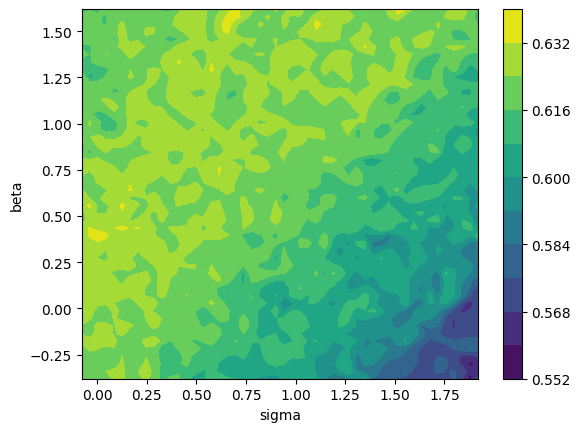

In [89]:
plt.contourf(*plot_contour(np.log10(X[:, 0]), np.log10(X[:, 1]), y[:,0]), levels=10, linestyles='solid')
plt.xlabel('sigma')
plt.ylabel('beta')
# plt.xscale('log')
# plt.yscale('log')
plt.colorbar()
# plt.contour(*plot_contour(np.log10(X[:, 0]), np.log10(X[:, 1]), y[:,0]), linestyles='solid', colors='black')

In [42]:
np.log10(X).max()

1.9208187539523753

In [63]:
np.meshgrid([0, 1, 2], [3, 4, 5])

[array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]),
 array([[3, 3, 3],
        [4, 4, 4],
        [5, 5, 5]])]

In [404]:
def gp_3d(fns):
        
    fig, ax = plt.subplots()
    X,y=[],[]
    for fn in fns:
        x=pickle.load(open(fn, 'rb'))

        for params, acc in x:
    #         print(params)
            X.append([*params.values()])
            y.append([acc])

    import numpy as np
    X = np.array(X)
    y = np.array(y)
    
    print(X.shape, y.shape)
    
    # GP
    import GPy
    gpy_model = GPy.models.GPRegression(np.log10(X), y, GPy.kern.RBF(4, lengthscale=1, variance=0.001), noise_var=1e-5)
    return gpy_model

(4800, 4) (4800, 1)


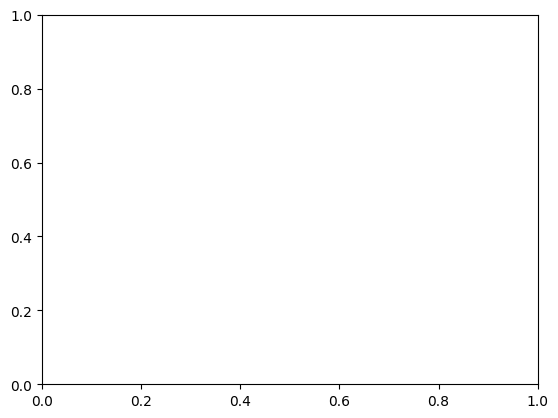

In [405]:
from glob import glob
model = gp_3d(glob('./output/ts_*'))

GP_regression.,value,constraints,priors
rbf.variance,0.001,+ve,
rbf.lengthscale,1.0,+ve,
Gaussian_noise.variance,1e-05,+ve,


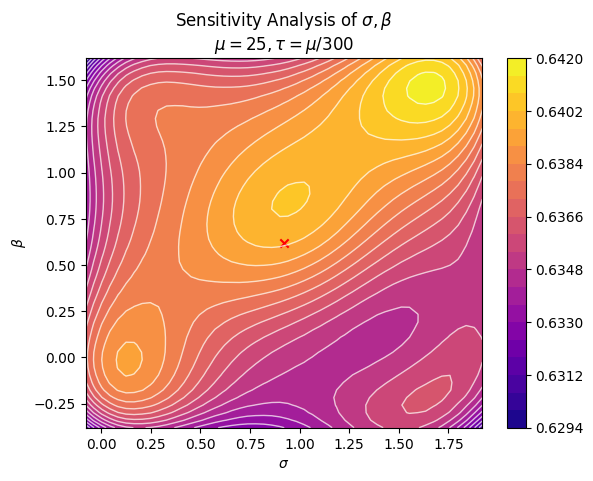

In [407]:
plot_file('output/tsp_search1.pkl', 'sigma', 'beta')

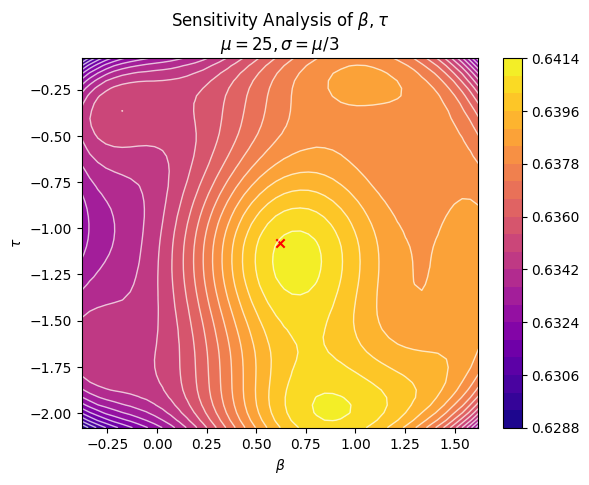

In [409]:
plot_file('output/tsp_search2.pkl', 'beta', 'tau')

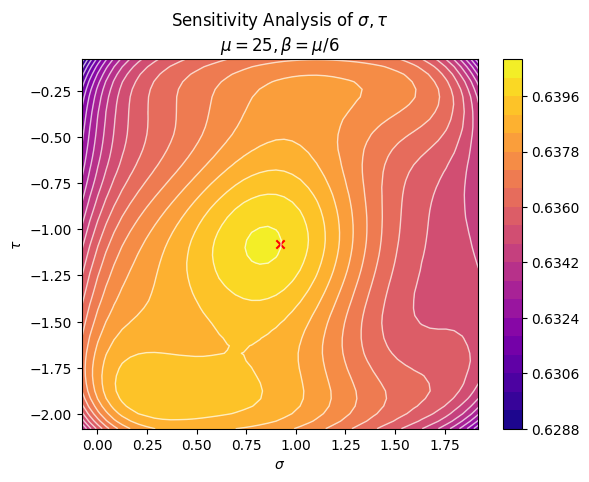

In [410]:
plot_file('output/tsp_search3.pkl', 'sigma', 'tau')